# Machine Learning

## Imports

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

## Data

In [508]:
origin_df = pd.read_csv('/Users/joseph/code/Ward-cloud/project/venezuela_fx/venezuela_fx/data/working_df.csv')

In [509]:
df = origin_df.copy()

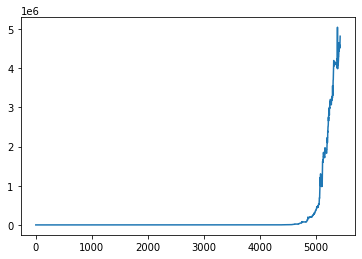

In [510]:
plt.plot(df['Dolartoday'])

In [511]:
df['Unnamed: 0'] = df['Unnamed: 0'].apply(pd.to_datetime)

In [512]:
df.rename(columns = {'Unnamed: 0':'date'}, inplace=True)

In [513]:
df = df.set_index('date')

(4900.0, 5600.0)

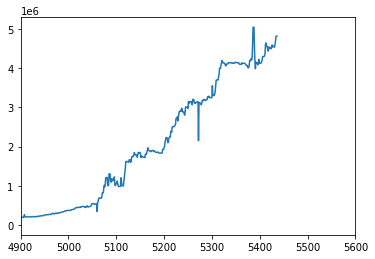

In [503]:
plt.plot(origin_df['Dolartoday'])
plt.xlim(4900, 5600)

## Flattening

In [404]:
X= df.drop(columns = ['Dolartoday'])
y= df['Dolartoday']

In [428]:
values = []
y_list =[]
target_distance = 1
seq_length =5
for idx in list(range(0,5430)):
    X_temp = X.iloc[idx:idx+seq_length]
    values.append(X_temp.values.reshape(-1))
    y_list.append(y[idx+target_distance])

X_df = pd.DataFrame(np.vstack(values))

y_series = pd.Series(y_list)

## Scaling

### Robust

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_series, test_size=0.30, shuffle=False )

In [12]:
scaler = RobustScaler().fit(X_train)

In [13]:
X_train = scaler.transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

## log scaler

In [519]:
log_scaled_df = np.log(df).diff()

In [515]:
log_scaled_df.shape

(3125, 19)

In [431]:
ls_test = log_scaled_df.iloc[2000:]

In [432]:
ls_train = log_scaled_df.iloc[:2000]

In [433]:
l_X_test = ls_test.drop(columns=['Dolartoday'])
l_y_test = ls_test['Dolartoday']

In [434]:
l_X_train = ls_train.drop(columns=['Dolartoday'])
l_y_train = ls_train['Dolartoday']

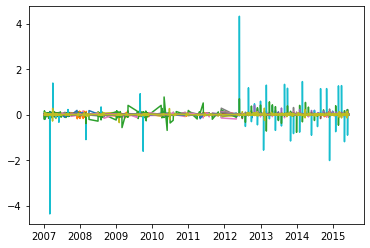

In [435]:
plt.plot(ls_train);

In [437]:
values = []
y_list =[]
target_distance = 1
seq_length =5
for idx in list(range(0,1118)):
    X_temp = l_X_test.iloc[idx:idx+seq_length]
    values.append(X_temp.values.reshape(-1))
    y_list.append(l_y_test[idx+target_distance])
flX_test = pd.DataFrame(np.vstack(values))

fly_test = pd.Series(y_list)

In [438]:
# flx_test = X_test
# fly_seri = y_test

In [439]:
values = []
y_list =[]
target_distance = 1
seq_length =5
for idx in list(range(0,1993)):
    X_temp = l_X_train.iloc[idx:idx+seq_length]
    values.append(X_temp.values.reshape(-1))
    y_list.append(l_y_train[idx+target_distance])
flX_train = pd.DataFrame(np.vstack(values))

fly_train = pd.Series(y_list)

In [440]:
# flx_train = X_train
# fly_train = y_train

In [441]:
## getting rid of infinites
flX_train.isin([np.inf, -np.inf]).sum().any()

True

In [442]:
flX_train.replace(np.inf, 0.0, inplace=True)
flX_train.replace(-np.inf, 0.0, inplace=True)

In [443]:
flX_test.isin([np.inf, -np.inf]).sum().any()

True

In [444]:
flX_test.replace(np.inf, 0.0, inplace=True)
flX_test.replace(-np.inf, 0.0, inplace=True)

In [445]:
fly_test.isin([np.inf, -np.inf]).sum().any()

False

## Train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_series, test_size=0.30)

## Models

### Linear

In [27]:
lin_model = LinearRegression().fit(X_train, y_train)

In [28]:
lin_model.score(X_test, y_test)

0.9892296545973631

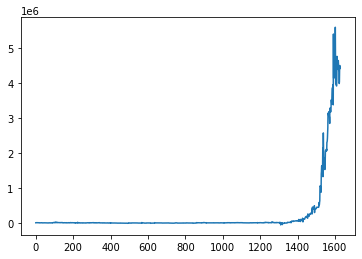

In [38]:
plt.plot(lin_model.predict(X_test.sort_index()))


### Ridge

In [40]:
ridge = Ridge(alpha=0.2).fit(X_train, y_train)

In [41]:
ridge.score(X_test, y_test)

0.989212797524971

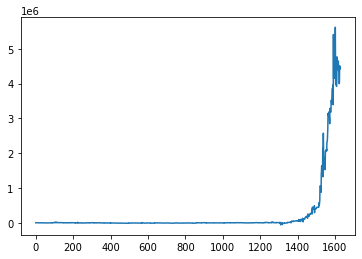

In [50]:
plt.plot(ridge.predict(X_test.sort_index()))

### Lasso

In [51]:
lasso = Lasso(alpha=0.5).fit(X_train, y_train)

/Users/joseph/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.468e+12, tolerance: 2.268e+11
  model = cd_fast.enet_coordinate_descent(


In [52]:
lasso.score(X_test, y_test)

0.9945081256279946

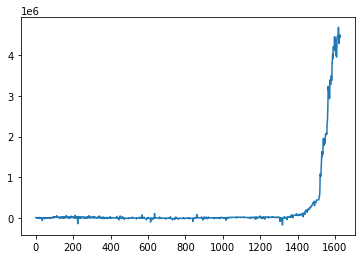

In [55]:
plt.plot(lasso.predict(X_test.sort_index()))


### Elastic Net

In [56]:
ideal_elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.9)

In [57]:
ideal_elastic_model.fit(X_train, y_train)

/Users/joseph/.pyenv/versions/3.8.12/envs/venezuela_fx/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.468e+12, tolerance: 2.268e+11
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.01, l1_ratio=0.9)

In [58]:
ideal_elastic_model.score(X_test,y_test)

0.9945083234925768

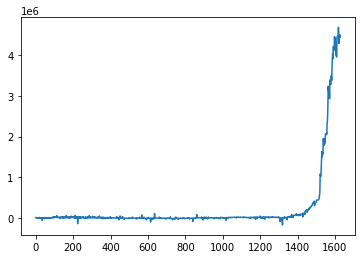

In [60]:
plt.plot(ideal_elastic_model.predict(X_test.sort_index()))

### Trees

In [64]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
tree.score(X_test,y_test)

0.996645109831384

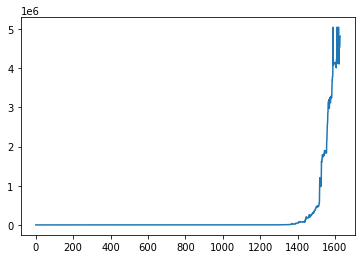

In [65]:
plt.plot(tree.predict(X_test.sort_index()))

In [68]:
forest = RandomForestRegressor(n_estimators=100)

In [69]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [70]:
forest.score(X_test, y_test)

0.9984173332352132

### Boosting

In [77]:
adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=6), n_estimators=50)


In [78]:
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6))

In [79]:
adaboost.score(X_test, y_test)

0.9982711606292409

In [82]:
grad_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)

In [83]:
grad_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6)

In [84]:
grad_model.score(X_test, y_test)

0.9984974708648021

In [93]:
grad_model.predict(X_test)

array([2.18404708e+01, 2.18404708e+01, 2.18404708e+01, ...,
       7.49008151e+03, 3.15845344e+06, 2.18404708e+01])

In [94]:
y_test

2070    1.121000e-04
2358    3.193000e-04
3450    1.094340e-02
3146    6.768800e-03
3613    3.986480e-02
            ...     
2091    1.200000e-04
4635    2.163012e+04
4555    7.879540e+03
5238    3.012482e+06
3806    7.107860e-02
Length: 1629, dtype: float64

In [96]:
mean_absolute_error(y_test, grad_model.predict(X_test))

4203.239696796866

In [95]:
r2_score(y_test, grad_model.predict(X_test))

0.9984974708648021

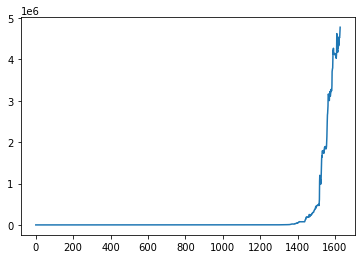

In [85]:
plt.plot(grad_model.predict(X_test.sort_index()))

### XGBOOST

In [89]:
xgb_model = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

In [90]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [91]:
xgb_model.score(X_test,y_test)

0.9984452701384285

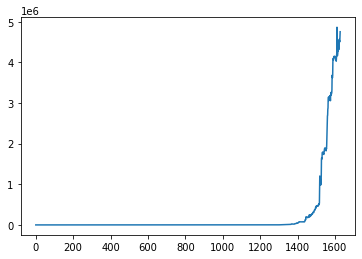

In [92]:
plt.plot(xgb_model.predict(X_test.sort_index()))

### XGBoost with fly

In [132]:
xgb_model = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

In [173]:
xgb_model.fit(flX_train, fly_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [182]:
xgb_model.score(flX_test, fly_test)

-1.021260600845939

### Adaboost with fly

In [216]:
adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=10), n_estimators=100, learning_rate=0.2)

In [217]:
adaboost.fit(flX_train, fly_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.2, n_estimators=100)

In [218]:
adaboost.score(flX_train, fly_train)

0.7030345163332727

In [262]:
estimators = [5,10,15,20,30,40,50,60,70,80,90,100]

In [263]:
learning_rate = [0.001,0.003,0.01,0.03,0.1,0.3]

In [308]:
grid = {'n_estimators': estimators, 'learning_rate': learning_rate, 'loss':['exponential']}
search = GridSearchCV(AdaBoostRegressor(), param_grid=grid, n_jobs=-1, verbose=1)

In [309]:
search.fit(flX_train, fly_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
                         'loss': ['exponential'],
                         'n_estimators': [5, 10, 15, 20, 30, 40, 50, 60, 70, 80,
                                          90, 100]},
             verbose=1)

In [310]:
search.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 40}

In [311]:
adaboost_1 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=10),loss='exponential', n_estimators=40, learning_rate=0.1)

In [312]:
adaboost_1.fit(flX_train, fly_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.1, loss='exponential', n_estimators=40)

In [313]:
adaboost_1.score(flX_test, fly_test)

-0.9136482095386975

In [314]:
r2_score(adaboost_1.predict(flX_test), fly_test)

-1.0575478307121706

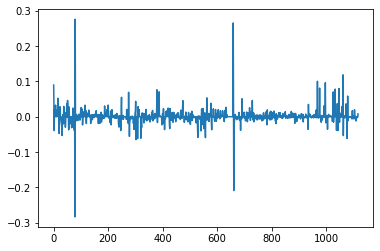

In [315]:
plt.plot(fly_test)

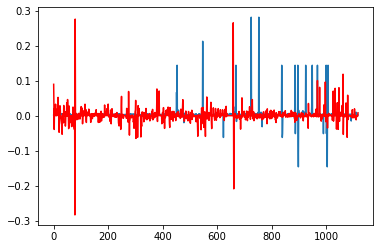

In [316]:
plt.plot(adaboost_1.predict(flX_test.sort_index()))
plt.plot(fly_test.sort_index(), color ='red')

### Forest with fly

In [446]:
forest = RandomForestRegressor(n_estimators=60)

In [447]:
forest.fit(flX_train, fly_train)

RandomForestRegressor(n_estimators=60)

In [448]:
forest.score(flX_train, fly_train)

0.8292397562803381

(150.0, 300.0)

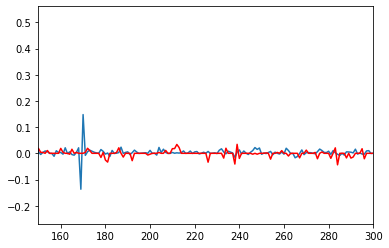

In [449]:
plt.plot(forest.predict(flX_test))
plt.plot(fly_test, color='red')
plt.xlim(150, 300)

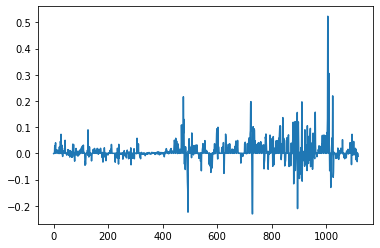

In [450]:
plt.plot(fly_test)

#### Turning back log and diff

In [451]:
pd.Series(forest.predict(flX_test))

0      -0.002999
1       0.004419
2       0.002532
3       0.004000
4       0.002303
          ...   
1113    0.016430
1114    0.000661
1115   -0.000853
1116   -0.000410
1117    0.002681
Length: 1118, dtype: float64

In [452]:
fly_test

0      -0.001080
1       0.000000
2       0.000000
3       0.000000
4       0.028513
          ...   
1113    0.000000
1114   -0.031792
1115    0.000000
1116    0.000000
1117   -0.011346
Length: 1118, dtype: float64

In [453]:
fly_real = np.exp(fly_test.cumsum())

In [454]:
fly_pred = np.exp((pd.Series(forest.predict(flX_test)).cumsum()))

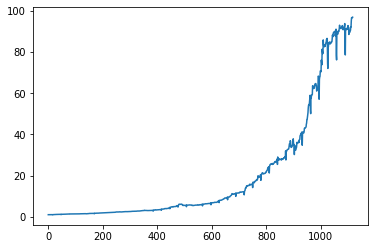

In [497]:
plt.plot(fly_pred)

In [458]:
origin_df['Dolartoday']

0       3.390000e-05
1       3.390000e-05
2       3.403571e-05
3       3.437500e-05
4       3.487500e-05
            ...     
5432    4.610000e+06
5433    4.690000e+06
5434    4.820000e+06
5435    4.820000e+06
5436    4.820000e+06
Name: Dolartoday, Length: 5437, dtype: float64

(4700.0, 5500.0)

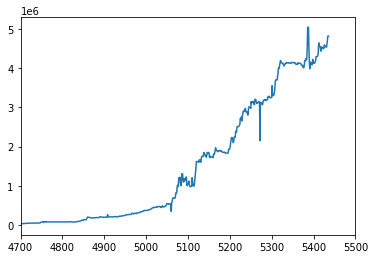

In [498]:
plt.plot(origin_df['Dolartoday'][2000:])
plt.xlim(400,5500)

In [393]:
y_test

2419         0.000360
1250         0.000076
4053         2.120555
2359         0.000318
2299         0.000247
            ...      
3052         0.003171
3897         0.211060
5041    500116.380000
45           0.000038
327          0.000061
Length: 1629, dtype: float64

In [389]:
fly_real

0       0.089450
1       0.100898
2       0.061545
3       0.082961
4       0.082961
          ...   
1113    0.872395
1114    0.872967
1115    0.870674
1116    0.870674
1117    0.878678
Length: 1118, dtype: float64

In [390]:
fly_pred

0       0.003762
1       0.006302
2       0.007781
3       0.009758
4       0.017247
          ...   
1113    6.526867
1114    6.525643
1115    6.527659
1116    6.535080
1117    6.534151
Length: 1118, dtype: float64

#### for loop

In [472]:
from tqdm.notebook import tqdm

In [492]:
pred_lst = []
actual_lst = []
interval = 3
sequence = 5
for idx in tqdm(range(len(log_scaled_df)-interval)):
    df_temp_train = log_scaled_df.iloc[idx:idx+sequence+1+interval]
    df_temp_test = log_scaled_df.iloc[idx+1:idx+sequence+1+1+interval]
    df_temp_X_train = df_temp_train.drop(columns = ['Dolartoday']).iloc[:-interval]
    df_temp_X_test = df_temp_test.drop(columns = ['Dolartoday']).iloc[:-interval]
    df_temp_y_train = df_temp_train['Dolartoday'].iloc[-1]
    df_temp_y_test = df_temp_test['Dolartoday'].iloc[-1]
    
    df_temp_X_train_flat = df_temp_X_train.values.flatten()
    break
    
    model_temp = RandomForestRegressor(n_jobs=-1)
    model_temp.fit(df_temp_X_train, pd.Series(df_temp_y_train))
    pred_temp = model_temp.predict(df_temp_X_test)
    pred_lst.append(pred_temp)
    actual_lst.append(df_temp_y_test)
    break

  0%|          | 0/3122 [00:00<?, ?it/s]

In [496]:
log_scaled_df.to_csv('/users/joseph/code/log_scaled.csv')

In [494]:
df_temp_X_train_flat.shape

(108,)

In [471]:
df_temp_y_test

0.08945046413035662

In [470]:
df_temp_y_train

date
2007-01-02    0.000000
2007-01-03    0.003995
2007-01-04    0.009919
2007-01-05    0.014441
2007-01-06    0.000000
2007-01-07    0.000000
2007-01-08    0.013326
Name: Dolartoday, dtype: float64

In [464]:
len(log_scaled_df)

3125

### ElasticNet with fly

In [305]:
elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.9)

In [306]:
elastic_model.fit(flX_train, fly_train)

ElasticNet(alpha=0.01, l1_ratio=0.9)

In [307]:
elastic_model.score(flX_test, fly_test)

-0.0033288632064798485

In [ ]:
# start with basic models = random forest
#turn them back


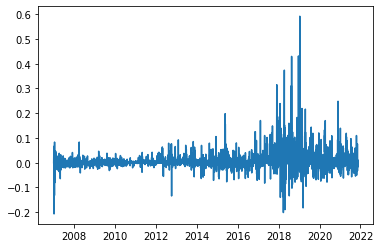

In [520]:
plt.plot(pd.Series(log_scaled_df['Stock_Market']))

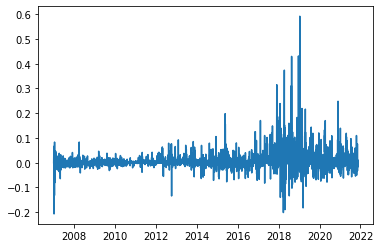

In [517]:
plt.plot(pd.Series(np.log(df['Stock_Market'])).diff())